<a href="https://colab.research.google.com/github/codeguy234/4410Homework/blob/main/HW6_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. K-Means Clustering on Dataset


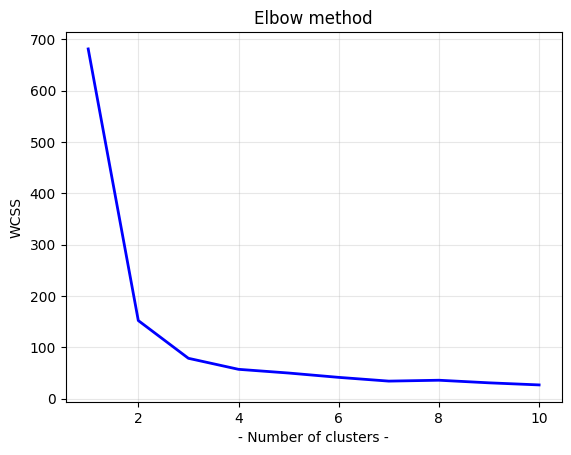


Logistic Regression on MNIST
Dataset shape: (10000, 784)
Target shape: (10000,)
Training set : (8000, 784)
Testing set : (2000, 784)

StandardScaler
Logistic Regression Without PCA
Training time: 11.25 seconds
Accuracy score: 0.9005
PCA with 0.95
Original features: 784
PCA components: 276
variance ratio: 0.9501
Training time: 7.90 seconds
Accuracy score: 0.9040
PCA Time Comparison
without PCA: 11.25 seconds
with PCA:    7.90 seconds
Training:          1.42x faster with PCA

Accuracy score without PCA: 0.9005
Accuracy score with PCA:    0.9040
Difference:  +0.0035

Dimensionality reduction: 784 -> 276 features
Reduction ratio: 64.8% fewer features


In [17]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


print("1. K-Means Clustering on Dataset")
# Load the iris dataset
iris = load_iris()
k_values = range(1, 11)
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

# the WCSS & k values
plt.plot(k_values, wcss, 'b-', linewidth=2)
plt.xlabel('- Number of clusters -')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.grid(True, alpha=0.3)
plt.show()

#2
print("\nLogistic Regression on MNIST")

mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

X = X[:10000]
y = y[:10000]

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set : {X_train.shape}")
print(f"Testing set : {X_test.shape}")


print("\nStandardScaler")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#WITHOUT PCA
print("Logistic Regression Without PCA")
start = time.time()
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
logisticRegr.fit(X_train_scaled, y_train)
train_time_no_pca = time.time() - start

start = time.time()
y_pred_no_pca = logisticRegr.predict(X_test_scaled)
predict_time_no_pca = time.time() - start

accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

print(f"Training time: {train_time_no_pca:.2f} seconds")
print(f"Accuracy score: {accuracy_no_pca:.4f}")

# PCA with 0.95
print("PCA with 0.95")
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original features: {X_train_scaled.shape[1]}")
print(f"PCA components: {pca.n_components_}")
print(f"variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

start = time.time()
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
logisticRegr_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start

start = time.time()
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
predict_time_pca = time.time() - start

accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Training time: {train_time_pca:.2f} seconds")
print(f"Accuracy score: {accuracy_pca:.4f}")

print("PCA Time Comparison")

print(f"without PCA: {train_time_no_pca:.2f} seconds")
print(f"with PCA:    {train_time_pca:.2f} seconds")
print(f"Training:          {train_time_no_pca/train_time_pca:.2f}x {'faster' if train_time_pca < train_time_no_pca else 'slower'} with PCA")

print(f"\nAccuracy score without PCA: {accuracy_no_pca:.4f}")
print(f"Accuracy score with PCA:    {accuracy_pca:.4f}")
print(f"Difference:  {accuracy_pca - accuracy_no_pca:+.4f}")

print(f"\nDimensionality reduction: {X_train_scaled.shape[1]} -> {pca.n_components_} features")
print(f"Reduction ratio: {(1 - pca.n_components_/X_train_scaled.shape[1])*100:.1f}% fewer features")